# EDA - 1

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_bike = pd.read_csv('/content/BIKE DETAILS.csv')

### 1. Range of selling prices

In [22]:
selling_range = (df_bike['selling_price'].min(), df_bike['selling_price'].max())


2. What is the median selling price for bikes in the datasetD

In [23]:
median_price = df_bike['selling_price'].median()

3. What is the most common seller typeD

In [24]:
common_seller = df_bike['seller_type'].mode()[0]

 4. How many bikes have driven more than 50,000 kilometersD

In [25]:
count_50k = df_bike[df_bike['km_driven'] > 50000].shape[0]


5. What is the average km_driven value for each ownership typeD

In [26]:
avg_km_owner = df_bike.groupby('owner')['km_driven'].mean()

6. What proportion of bikes are from the year 2015 or older

In [27]:
prop_2015 = (df_bike[df_bike['year'] <= 2015].shape[0]) / len(df_bike)

7. What is the trend of missing values across the datasetD

In [28]:
missing = df_bike.isnull().sum()


8.What is the highest ex_showroom_price recorded, and for which bikeD


In [29]:
idx = df_bike['ex_showroom_price'].idxmax()
highest_price = df_bike.loc[idx, ['name','ex_showroom_price']]

9. What is the total number of bikes listed by each seller typeD

In [30]:
count_seller = df_bike['seller_type'].value_counts()

10. What is the relationship between selling_price and km_driven for first-owner bikes

In [31]:
first_owner_relation = df_bike[df_bike['owner']=="1st owner"][['selling_price','km_driven']]


11. Identify and remove outliers in the km_driven column using the IQR methodB

In [32]:
Q1 = df_bike['km_driven'].quantile(0.25)
Q3 = df_bike['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_bike_clean = df_bike[(df_bike['km_driven'] >= Q1 - 1.5*IQR) &
                        (df_bike['km_driven'] <= Q3 + 1.5*IQR)]

12. Perform a bivariate analysis to visualize the relationship between year and selling_priceB

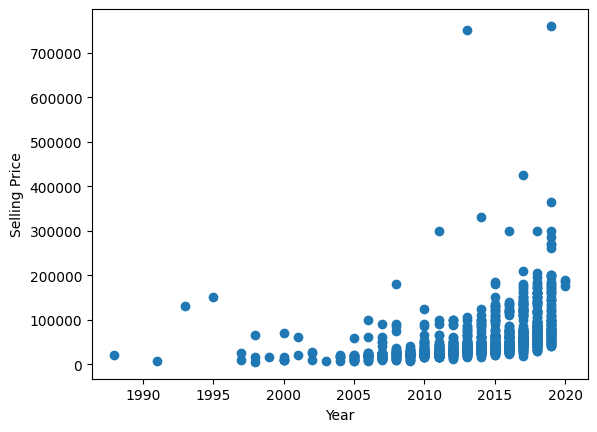

In [33]:
plt.scatter(df_bike['year'], df_bike['selling_price'])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)D

In [34]:
current_year = 2024
df_bike['age'] = current_year - df_bike['year']
avg_depreciation = df_bike.groupby('age')['selling_price'].mean()

14. Which bike names are priced significantly above the average price for their manufacturing yearD

In [35]:
year_avg = df_bike.groupby('year')['selling_price'].mean()
df_bike['year_avg'] = df_bike['year'].map(year_avg)
above_avg_bikes = df_bike[df_bike['selling_price'] > df_bike['year_avg']]['name'].unique()


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

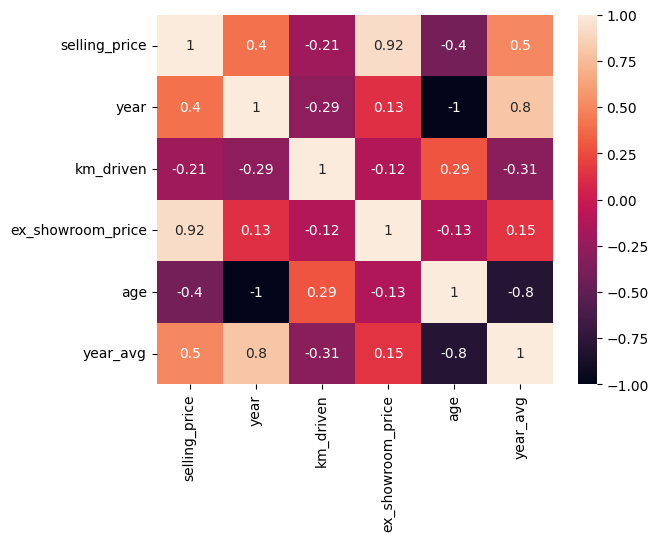

In [36]:
sns.heatmap(df_bike.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

# EDA - 2

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df_car = pd.read_csv('/content/Car Sale.csv')

1. Average price per dealer

In [39]:
avg_price_dealer = df_car.groupby('Dealer_Name')['Price ($)'].mean()

2. Brand with highest price variation

In [40]:
price_var = df_car.groupby('Company')['Price ($)'].var().sort_values(ascending=False)

3. Distribution of car prices by transmission

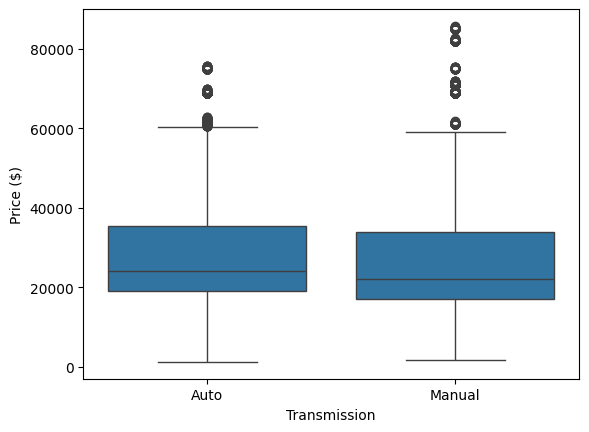

In [41]:
sns.boxplot(x='Transmission', y='Price ($)', data=df_car)
plt.show()

 4. Price distribution across regions

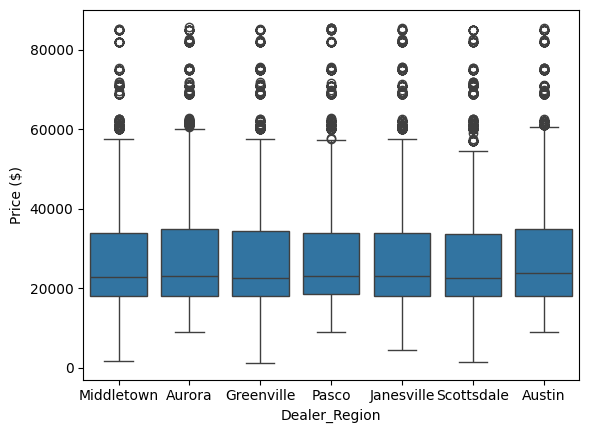

In [42]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df_car)
plt.show()

 5. Distribution by body style

In [43]:
body_style_count = df_car['Body Style'].value_counts()

 6. Avg price by gender & income

In [44]:
avg_price_gender_income = df_car.groupby(['Gender'])[['Price ($)','Annual Income']].mean()


 7. Car prices & count by region

In [45]:
price_region = df_car.groupby('Dealer_Region')['Price ($)'].mean()
count_region = df_car['Dealer_Region'].value_counts()

 8. Avg price by engine size

In [46]:
avg_engine_price = df_car.groupby('Engine')['Price ($)'].mean()

 9. Price variation by income bracket

In [48]:
df_car['Income_bracket'] = pd.cut(df_car['Annual Income'],
                                  bins=[0,30000,60000,100000,200000],
                                  labels=['Low','Mid','High','Very High'])
price_bracket = df_car.groupby('Income_bracket')['Price ($)'].mean()

/tmp/ipython-input-2213196147.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_bracket = df_car.groupby('Income_bracket')['Price ($)'].mean()


 10. Top 5 best-selling models & price distribution

In [50]:
top_models = df_car['Model'].value_counts().head(5).index
model_dist = df_car[df_car['Model'].isin(top_models)]

 11. Price vs engine size by car color

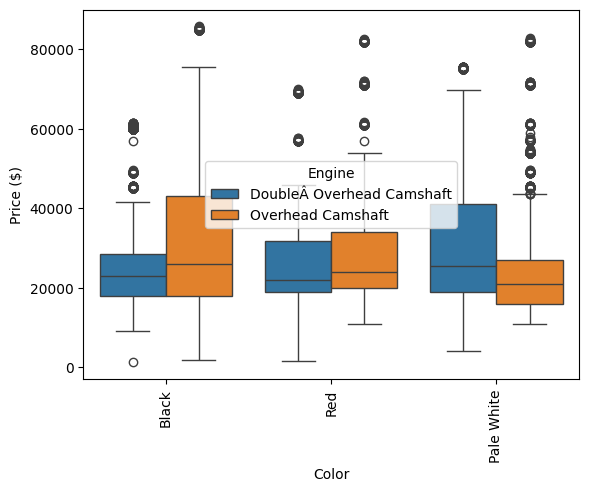

In [51]:
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df_car)
plt.xticks(rotation=90)
plt.show()


 12. Seasonal trend (monthly)

In [52]:
df_car['Date'] = pd.to_datetime(df_car['Date'])
df_car['Month'] = df_car['Date'].dt.month
monthly_sales = df_car.groupby('Month')['Price ($)'].mean()

 13. Body style × transmission price distribution

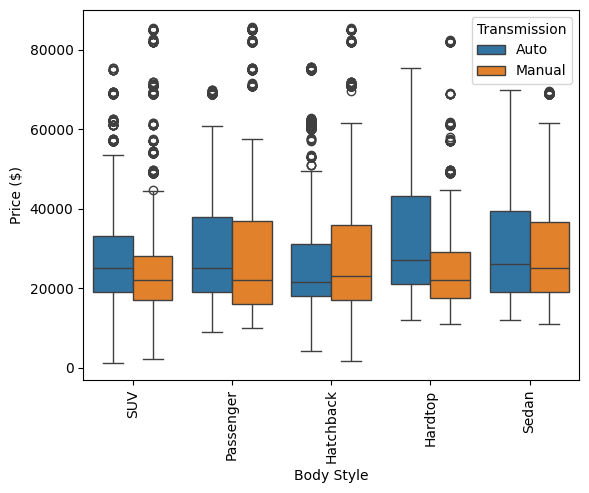

In [53]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df_car)
plt.xticks(rotation=90)
plt.show()

 14. Correlation between price, engine, income

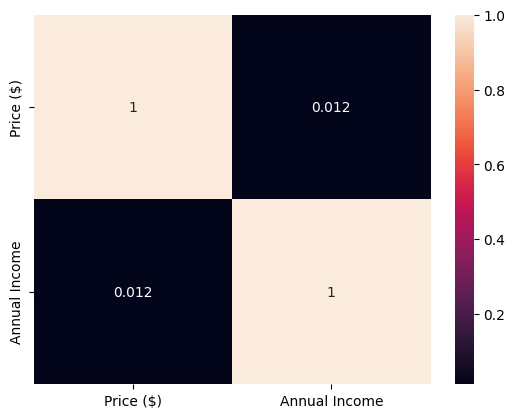

In [54]:
sns.heatmap(df_car[['Price ($)','Annual Income']].corr(), annot=True)
plt.show()

 15. Avg price across models & engine types

In [55]:
avg_price_model_engine = df_car.groupby(['Model','Engine'])['Price ($)'].mean()


##EDA - 3

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
df_amz = pd.read_csv('/content/amazon.csv')

 1. Avg rating per category

In [60]:
df_amz['rating'] = pd.to_numeric(df_amz['rating'], errors='coerce')
avg_rating_cat = df_amz.groupby('category')['rating'].mean()

 2. Top rating_count products by category

In [61]:
top_rating_products = df_amz.sort_values('rating_count', ascending=False).groupby('category').head(5)

 3. Distribution: discounted vs actual price

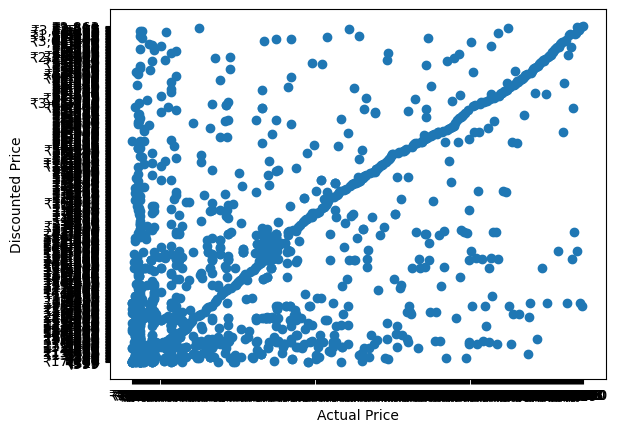

In [62]:
plt.scatter(df_amz['actual_price'], df_amz['discounted_price'])
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.show()

 4. Avg discount % by category

In [64]:
df_amz['discount_percentage'] = df_amz['discount_percentage'].str.replace('%', '')
df_amz['discount_percentage'] = pd.to_numeric(df_amz['discount_percentage'], errors='coerce')
avg_discount = df_amz.groupby('category')['discount_percentage'].mean()

 5. Most popular product names

In [65]:
popular_names = df_amz['product_name'].value_counts().head(10)

 6. Most popular product keywords

In [66]:
keywords = df_amz['about_product'].str.split().explode().value_counts().head(20)

7. Most popular reviews

In [67]:
top_reviews = df_amz['review_title'].value_counts().head(15)

 8. Correlation between discounted_price & rating

In [69]:
df_amz['discounted_price'] = df_amz['discounted_price'].str.replace('₹', '', regex=False)
df_amz['discounted_price'] = pd.to_numeric(df_amz['discounted_price'], errors='coerce')
corr = df_amz[['discounted_price','rating']].corr()

9. Top 5 highest rated categories

In [70]:
top5_cat = df_amz.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

 10. Identify any potential areas for improvement or optimization based on the data analysis.

In [72]:
suggestions = """
- Fix missing review values
- Remove duplicate products
- Normalize price columns
- Extract sentiment from reviews
"""
print(suggestions)


- Fix missing review values
- Remove duplicate products
- Normalize price columns
- Extract sentiment from reviews



## EDA 4

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df_sp = pd.read_csv('/content/spotify.csv')

 1. Null & duplicates

In [76]:
df_sp = df_sp.drop_duplicates()
df_sp = df_sp.fillna(method='ffill')


/tmp/ipython-input-3247563090.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp = df_sp.fillna(method='ffill')


2. Popularity distribution

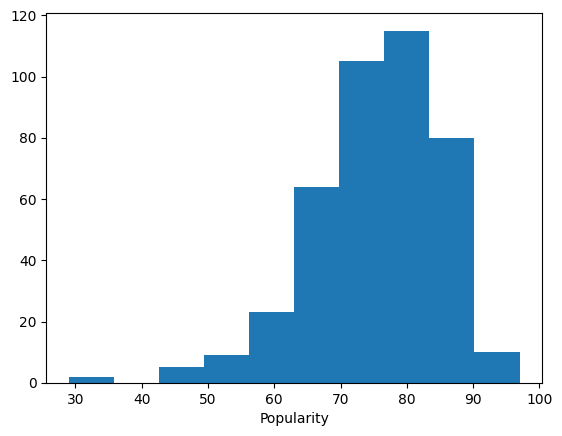

In [77]:
plt.hist(df_sp['Popularity'])
plt.xlabel("Popularity")
plt.show()


3. Popularity vs duration

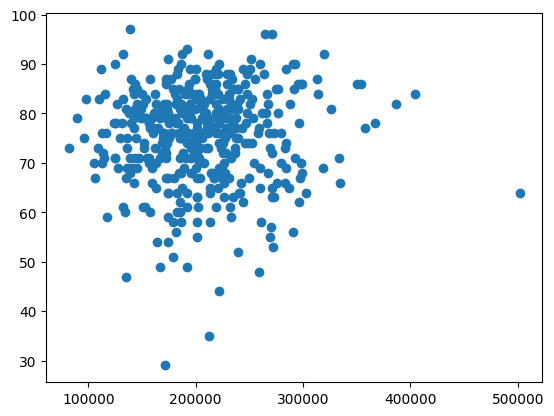

In [78]:
plt.scatter(df_sp['Duration (ms)'], df_sp['Popularity'])
plt.show()

4. Artist with highest number of tracks

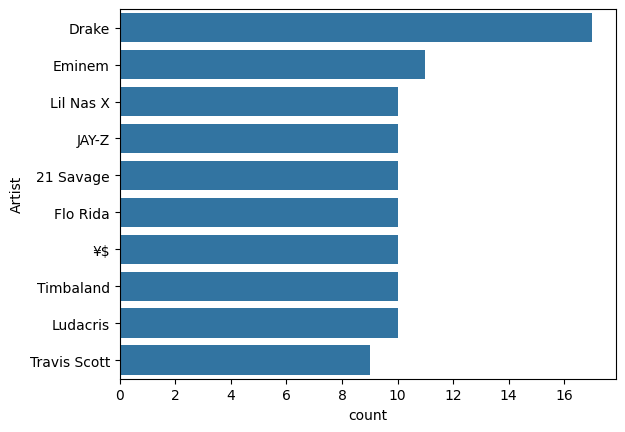

In [80]:
artist_count = df_sp['Artist'].value_counts()
sns.countplot(y=df_sp['Artist'], order=df_sp['Artist'].value_counts().head(10).index)
plt.show()

5. Top 5 least popular tracks

In [81]:
least_5 = df_sp.nsmallest(5,'Popularity')[['Artist','Track Name']]

6. Top 5 most popular artists avg popularity

In [82]:
popular_artists = df_sp.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

7. Most popular track per top artist

In [83]:
top_tracks = df_sp.loc[df_sp.groupby('Artist')['Popularity'].idxmax()][['Artist','Track Name']]



8. Pair plot

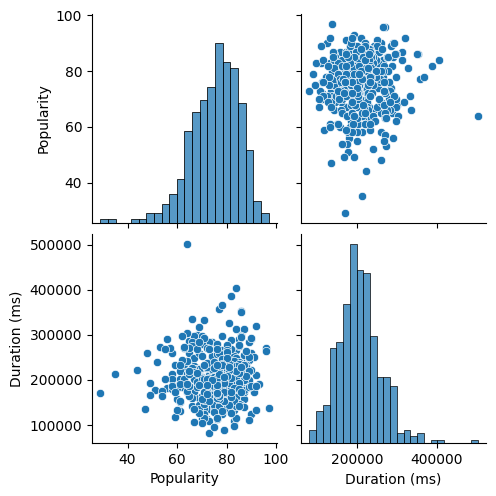

In [84]:
sns.pairplot(df_sp[['Popularity','Duration (ms)']])
plt.show()

9. Duration variation across artists

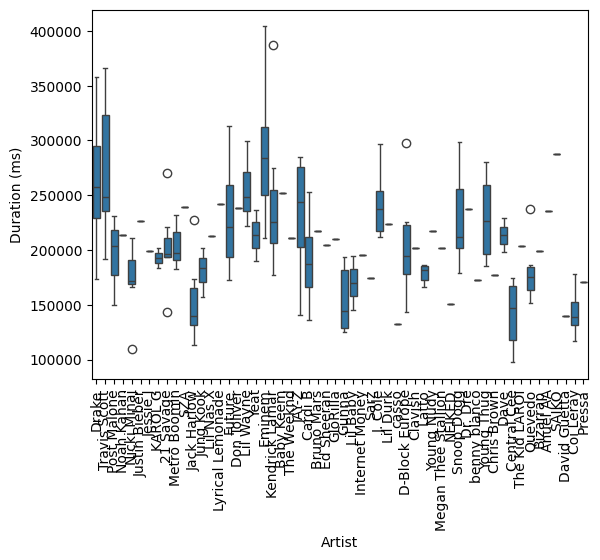

In [85]:
sns.boxplot(x='Artist', y='Duration (ms)', data=df_sp.head(200))
plt.xticks(rotation=90)
plt.show()


10. Popularity distribution per artist

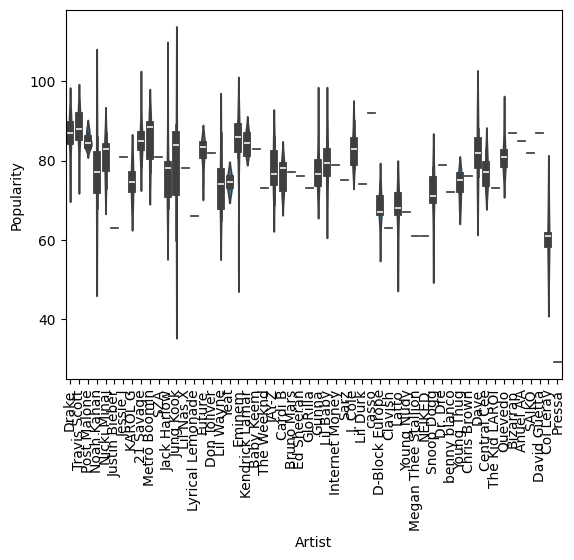

In [86]:
sns.violinplot(x='Artist', y='Popularity', data=df_sp.head(200))
plt.xticks(rotation=90)
plt.show()